# TUTORIAL 7: Simple Linear Regression (SLR) Tutorial

### Learning Objectives:

- Fit and interpret an OLS model for simple linear regression
- Find the 95% confidence interval (CI) for a mean response
- Find the 95% prediction invterval (PI) for a predicted response

### Importing Relevant Libraries!

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sy
from scipy import stats  
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

## <span style='background :yellow' > Tutorial Problem </span>

You are a member of a research team in a chemical engineering department at a university. Your team is conducting experiments to optimize the yield of a specific chemical reaction in a laboratory reactor. The objective is to determine how various operational parameters affect the efficiency of the reaction.

In your recent experiments, you collected data on several variables, including temperature, mixing speed, and the presence of baffles in the reactor. This data is crucial for understanding the best conditions to maximize the yield of the desired product.

You have access to a dataset titled Reactor_Data.csv, which includes the following columns:

**Sample:** Identifier for each experiment.

**Temp_C:** The temperature (in degrees Celsius) during the experiment.

**Speed_100RPM:** The speed of mixing in revolutions per minute, where the recorded value is the actual RPM divided by 100.

**Yield_g:** The amount of product obtained from the reaction (in grams).

**Baffles:** Indicates whether baffles were used in the reactor (True/False).

In [3]:
reactor = pd.read_csv('Reactor_Data.csv')
print(reactor)
reactor.describe()

    Sample  Temp_C  Speed_100RPM  Yield_g  Baffles
0        0      82            43       51    False
1        1      90            37       30     True
2        2      88            42       40     True
3        3      86            33       28     True
4        4      80            43       49    False
5        5      78            43       49     True
6        6      82            39       44     True
7        7      83            43       59    False
8        8      64            43       60    False
9        9      73            44       59    False
10      10      60            44       57    False
11      11      60            44       62    False
12      12     101            44       42    False
13      13      92            49       38     True


,Sample,Temp_C,Speed_100RPM,Yield_g
count,14.0000,14.000000,14.000000,14.000000
mean,6.5000,79.928571,42.214286,47.714286
std,4.1833,12.124129,3.765809,11.138489
min,0.0000,60.000000,33.000000,28.000000
25%,3.2500,74.250000,42.250000,40.500000
50%,6.5000,82.000000,43.000000,49.000000
75%,9.7500,87.500000,44.000000,58.500000
max,13.0000,101.000000,49.000000,62.000000


## Step 1: Find the simple linear regression model using temperature, mixing speed and reactor type.  Copy the summary of the results for each.  Show a regression plot for each model and interpret the results.     

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.520   
Dependent Variable: Yield_g          AIC:                98.7841 
Date:               2024-11-08 10:11 BIC:                100.0622
No. Observations:   14               Log-Likelihood:     -47.392 
Df Model:           1                F-statistic:        15.09   
Df Residuals:       12               Prob (F-statistic): 0.00217 
R-squared:          0.557            Scale:              59.535  
------------------------------------------------------------------
             Coef.    Std.Err.     t     P>|t|    [0.025   0.975] 
------------------------------------------------------------------
Intercept   102.5197   14.2579   7.1904  0.0000  71.4543  133.5851
Temp_C       -0.6857    0.1765  -3.8847  0.0022  -1.0703   -0.3011
-----------------------------------------------------------------
Omnibus:               1.093        Durbin-Watson:          2.123
Prob(Omnibus):        

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


[Text(0.5, 0, 'Temperature [C]'), Text(0, 0.5, 'Yield (g)')]

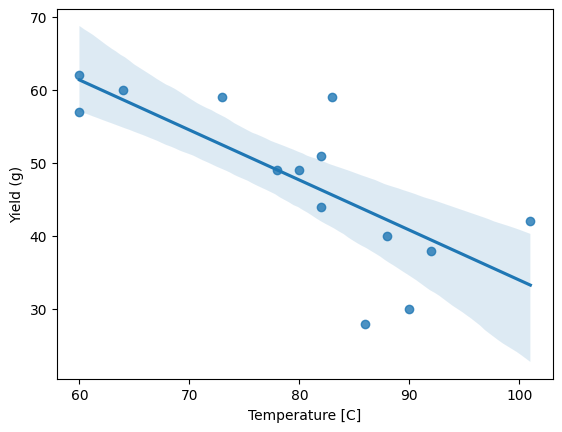

In [4]:
#Temperature
temp_model = ols('Yield_g~Temp_C',data=reactor)
result_temp = temp_model.fit()
print(result_temp.summary2())

#Regression plot
ax = sns.regplot(x='Temp_C', y='Yield_g', data=reactor)
ax.set(xlabel='Temperature [C]', ylabel='Yield (g)')

### Interpretation: 

Model: y = 102.5197 - 0.6857x

The temp coefficient is -0.6857. The coefficient is statistically significant because the CI does not span zero.

Interpretation: For every 1 degree increase in temp, the yield will decrease by 0.6857 grams.

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.520   
Dependent Variable: Yield_g          AIC:                98.7841 
Date:               2024-11-08 10:11 BIC:                100.0622
No. Observations:   14               Log-Likelihood:     -47.392 
Df Model:           1                F-statistic:        15.09   
Df Residuals:       12               Prob (F-statistic): 0.00217 
R-squared:          0.557            Scale:              59.535  
------------------------------------------------------------------
             Coef.    Std.Err.     t     P>|t|    [0.025   0.975] 
------------------------------------------------------------------
Intercept   102.5197   14.2579   7.1904  0.0000  71.4543  133.5851
Temp_C       -0.6857    0.1765  -3.8847  0.0022  -1.0703   -0.3011
-----------------------------------------------------------------
Omnibus:               1.093        Durbin-Watson:          2.123
Prob(Omnibus):        

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


[Text(0.5, 0, 'Speed [100 RPM]'), Text(0, 0.5, 'Yield (g)')]

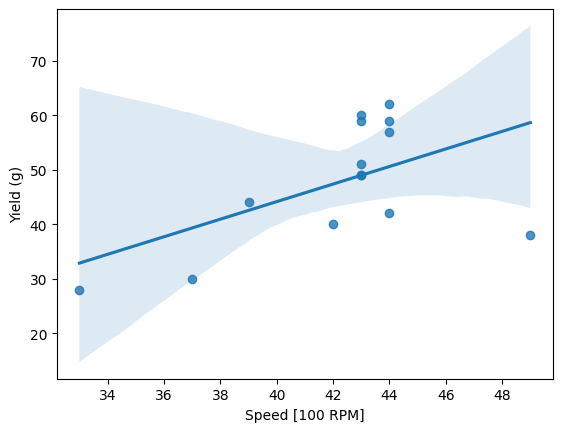

In [5]:
# Speed
speed_model = ols('Yield_g~Speed_100RPM',data=reactor)
result_speed = speed_model.fit()
print(result_temp.summary2())

# Regression plot
ax = sns.regplot(x='Speed_100RPM', y='Yield_g', data=reactor)
ax.set(xlabel='Speed [100 RPM]', ylabel='Yield (g)')


### Interpretation:

Model: y = -20.2604 + 1.6102x

The speed coefficient is 1.61. The coefficient is statistically significant because the CI does not span zero.

Interpretation: For every 100RPM increase in speed, yield increases by 1.6g.

                 Results: Ordinary least squares
Model:               OLS              Adj. R-squared:     0.560  
Dependent Variable:  Yield_g          AIC:                97.5835
Date:                2024-11-08 10:11 BIC:                98.8616
No. Observations:    14               Log-Likelihood:     -46.792
Df Model:            1                F-statistic:        17.52  
Df Residuals:        12               Prob (F-statistic): 0.00126
R-squared:           0.593            Scale:              54.642 
-----------------------------------------------------------------
                 Coef.   Std.Err.    t    P>|t|   [0.025   0.975]
-----------------------------------------------------------------
Intercept        54.8750   2.6135 20.9969 0.0000  49.1807 60.5693
Baffles[T.True] -16.7083   3.9922 -4.1853 0.0013 -25.4065 -8.0102
-----------------------------------------------------------------
Omnibus:               1.163        Durbin-Watson:          1.800
Prob(Omnibus):         0.55

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


[Text(0.5, 0, 'Baffles [Y/N]'), Text(0, 0.5, 'Yield (g)')]

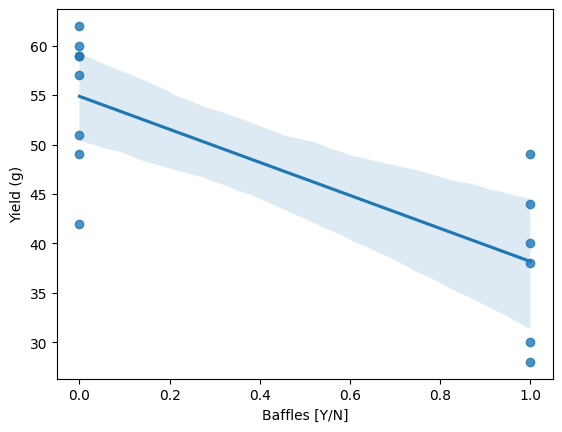

In [6]:
# Speed
baffle_model = ols('Yield_g~Baffles',data=reactor)
result_baffle = baffle_model.fit()
print(result_baffle.summary2())

# Regression plot
ax = sns.regplot(x='Baffles', y='Yield_g', data=reactor)
ax.set(xlabel='Baffles [Y/N]', ylabel='Yield (g)')

### Interpretation:

Model: y = 54.8750 - 16.7083x

The baffles coefficient is statistically significant.

Interpretation: When you have baffles, yield increases by 16.7g.

## Step 2: Review linear regression assumptions.  

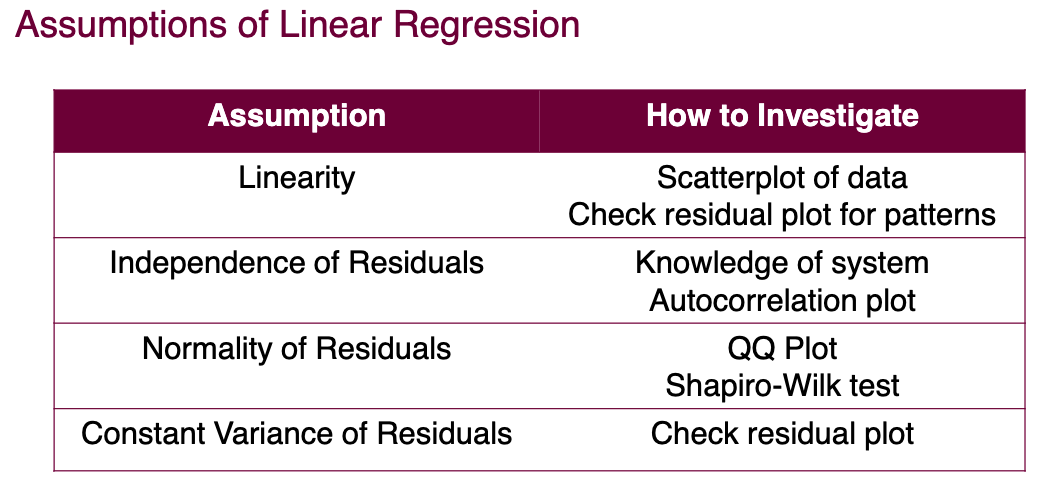

**First, linearity will be assessed through visual inspection of the scatterplot.**

Text(0.5, 1.0, 'Yield vs Temperature')

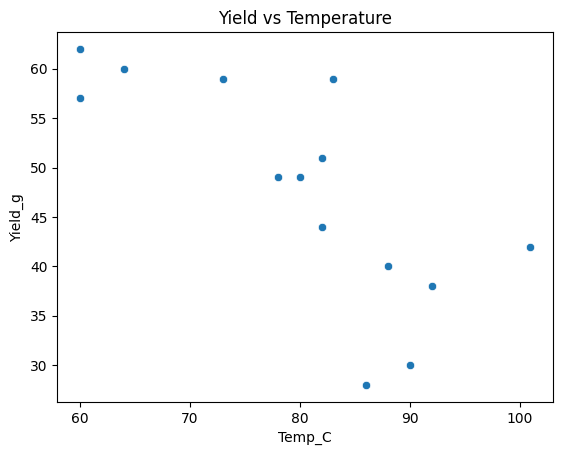

In [7]:
# Create a scatterplot

sns.scatterplot(x='Temp_C', y='Yield_g', data=reactor)
plt.title('Yield vs Temperature')

**Next, normality of residuals will be assessed using a QQ-plot and the Shapiro-Wilk test.**

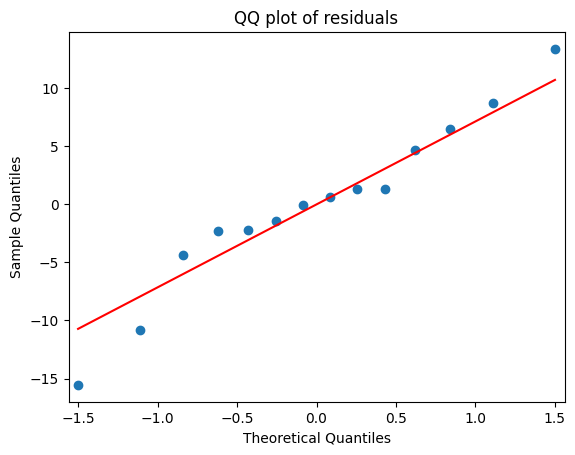

In [8]:
# Create a QQ plot

sm.qqplot(result_temp.resid, line ='s')
plt.title('QQ plot of residuals')
plt.show()

In [9]:
# Conduct the Shapiro-Wilk test
print(stats.shapiro(result_temp.resid))

ShapiroResult(statistic=0.967010498046875, pvalue=0.8343298435211182)


**Lastly, the constant variance of the errors (homoscedasticity) can be checked through visual inspection of the residual plot.**

Text(0.5, 1.0, 'Residual plot')

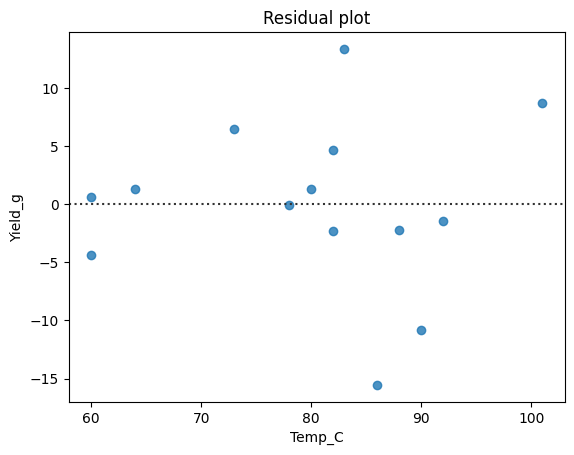

In [10]:
# Create a residual plot

sns.residplot(x='Temp_C', y='Yield_g', data=reactor)
plt.title('Residual plot')

## Step 3: Provide a 95% confidence interval for the prediction from each model at a temperature of 70°C. Calculate with python. 

In [11]:
result_temp.get_prediction(exog=dict(Temp_C=70)).summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,54.52211,2.706225,48.625751,60.418468,36.706577,72.337643


### Discuss what this confidence interval means in general and in the context of the example.

The 95% CI is 48.64, 60.42.

This indicates that we are 95% confident that the true mean outcome for the population a temp of 70oC falls within this range.

## Step 4: Provide a 95% prediction interval for the prediction at a speed of 4000 RPM given SSx = 184.36. Calculate by hand.

In [12]:
result_speed.get_prediction(exog=dict(Speed_100RPM=40)).summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,44.14878,3.044702,37.514945,50.782614,21.946155,66.351404


### Discuss what this prediction interval means in general and in the context of the example.

This denotes the range within we can be 95% confident that the next measurement of the same population will fall.

In [15]:
n = 14
mean = 42.214
MSE = 94.571
SSx = 184.30

se2y = np.sqrt(MSE*(1 + 1/n + ((40 - 42.214)**2)/SSx))
se2y

10.190258110422713

In [16]:
t_crit = stats.t.ppf(1-0.05/2, n-2)
t_crit

2.1788128296634177

In [19]:
y_pred = -20.2604 + 1.6102*(40)
y_pred

44.1476

In [22]:
print("95% PI: ", y_pred - t_crit*se2y, y_pred + t_crit*se2y)

95% PI:  21.944934891429295 66.3502651085707
